<a href="https://colab.research.google.com/gist/Leo-Sun-BMSTU/bede51f13daaf0e40dcd59cd31107e7a/lab_4_1_1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №4

# Дерево принятия решений

импортируем все нужные модули

In [31]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier #классификатор
from sklearn.model_selection import train_test_split #разделение данных
from sklearn import metrics #вычисление точности предсказаний
import graphviz
from sklearn.tree import export_graphviz #это чтобы выводить изображения
import pydotplus
from ipywidgets import Image
from io import StringIO
import pydot
from sklearn.metrics import recall_score
from sklearn.ensemble import RandomForestClassifier # случайный лес
from sklearn.model_selection import cross_val_score # кросс-валидация
from sklearn.model_selection import cross_validate #
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pylab as plt
import seaborn as sns
from matplotlib import pyplot as plt

#библиотеки для градиентного бустинга
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
!pip3 install catboost
from catboost import CatBoostClassifier
import lightgbm as ltbmax_score_BoostClassifier

загружаем данные

In [32]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/SolarPrediction.csv")
data.head() #таблица данных

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


выясняем типы данных в каждом столбце таблицы

In [33]:
data.dtypes

UNIXTime                    int64
Data                       object
Time                       object
Radiation                 float64
Temperature                 int64
Pressure                  float64
Humidity                    int64
WindDirection(Degrees)    float64
Speed                     float64
TimeSunRise                object
TimeSunSet                 object
dtype: object

удаляем ненужные столбцы (все столбцы типа object + столбец UNIXTime)

In [34]:
data.drop(['UNIXTime'], axis=1, inplace=True)
data.drop(['Data'], axis=1, inplace=True)
data.drop(['Time'], axis=1, inplace=True)
data.drop(['TimeSunRise'], axis=1, inplace=True)
data.drop(['TimeSunSet'], axis=1, inplace=True)
data.drop(['Radiation'], axis=1, inplace=True)

In [35]:
data.head() #новая таблица

,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
0,48,30.46,59,177.39,5.62
1,48,30.46,58,176.78,3.37
2,48,30.46,57,158.75,3.37
3,48,30.46,60,137.71,3.37
4,48,30.46,62,104.95,5.62


меняем порядок столбцов для удобства (так надо)

In [36]:
data = data[['Temperature', 'Pressure', 'Humidity', 'Speed', 'WindDirection(Degrees)']]

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
data.head() #новая таблица

,Temperature,Pressure,Humidity,Speed,WindDirection(Degrees)
0,48,30.46,59,5.62,177.39
1,48,30.46,58,3.37,176.78
2,48,30.46,57,3.37,158.75
3,48,30.46,60,3.37,137.71
4,48,30.46,62,5.62,104.95


преобразуем предсказываемые данные к бинарному виду

In [39]:
counts = data['WindDirection(Degrees)']
for i in range(len(counts)):
     if counts[i] < 90 or counts[i] > 315:
       counts[i] = 0
     else:
       counts[i] = 1
print(counts) 

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
32681    1.0
32682    1.0
32683    1.0
32684    1.0
32685    0.0
Name: WindDirection(Degrees), Length: 32686, dtype: float64


мальчики - налево, девочки - направо, кто не определился - по середине

In [40]:
learn = data[data.columns[:4]] #на этих данных мы обучаемся
aim = data['WindDirection(Degrees)'].astype(int) #целевой столбец

In [41]:
data_train, data_test, aim_train, aim_test = train_test_split(learn, aim, test_size=0.3, random_state=1)
#разбиваем все данные на тренировочные и проверочные

!!!

In [42]:
clf = DecisionTreeClassifier() #создаем классификатор
clf = clf.fit(data_train, aim_train) #обучаем
aim_pred = clf.predict(data_test) #предсказываем

In [43]:
print ("Точность для обучающей выборки:    ", format(clf.score(data_train, aim_train)))
print ("Точность для тестовой выборки:    ", format(clf.score(data_test, aim_test)))

Точность для обучающей выборки:     0.9587412587412587
Точность для тестовой выборки:     0.7726901896797879


визуализация дерева

In [44]:
dot_data = StringIO()
params = ['Temperature', 'Pressure', 'Humidity', 'Speed']
export_graphviz(clf, feature_names=params, 
out_file=dot_data, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(value=graph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.128047 to fit



Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x7f\xff\x00\x00\x02w\x08\x02\x00\x00\x00\xb9\xcc\xb6…

In [45]:
# оценка recall одного дерева
clf = DecisionTreeClassifier(criterion='entropy', max_depth=2)  
clf.fit(data_train, aim_train)
aim_pred = clf.predict(data_test)
print ("Точность для обучающей выборки:    ", format(clf.score(data_train, aim_train)))
print ("Точность для тестовой выборки:    ", format(clf.score(data_test, aim_test)))

Точность для обучающей выборки:     0.7935314685314685
Точность для тестовой выборки:     0.7962471955945339


визуализация нового дерева

In [46]:
dot_data = StringIO()
params = ['Temperature', 'Pressure', 'Humidity', 'Speed']
export_graphviz(clf, feature_names=params, 
out_file=dot_data, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(value=graph.create_png())

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x03\'\x00\x00\x01g\x08\x06\x00\x00\x00\xbcn6\xec\x00…

# Случайный лес

случайный лес обычный

In [47]:
rf = RandomForestClassifier(n_estimators=20, max_depth=3).fit(data_train, aim_train)
predicted_rf = rf.predict(data_test)
recall_score_rand_forest = recall_score(aim_test, predicted_rf, average='micro')
print('точность предсказания:', recall_score_rand_forest)

точность предсказания: 0.8088925147868652


In [48]:
#кросс-валидация
rf = RandomForestClassifier(n_estimators=5, max_depth=5)

score_cross_val = cross_val_score(rf, data, aim, cv=5)
print('точность предсказания:', score_cross_val)

точность предсказания: [1. 1. 1. 1. 1.]


выясняем значимые параметры

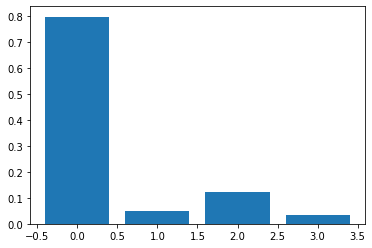

,feature,importance
0,Temperature,0.796521
2,Humidity,0.120419
1,Pressure,0.047355
3,Speed,0.035706


In [49]:
rf.fit(data_train, aim_train)
fi = pd.DataFrame({'feature': list(data_train.columns),
                   'importance': rf.feature_importances_}).\
                    sort_values('importance', ascending = False)


# Выводим значения
plt.bar(range(len(rf.feature_importances_)), rf.feature_importances_)
plt.show()
fi.head()

как видим, самым значимым параметром является температура

In [50]:
# подберем лучшие гиперпараметры

recall_score_rand_forest_max = -1

for n_estimators_iter in range(1, 100, 20):
    for depth_iter in  range(2, 5):
        rf = RandomForestClassifier(n_estimators=n_estimators_iter, max_depth=depth_iter).fit(data_train, aim_train)
        predicted_rf = rf.predict(data_test)
        recall_score_rand_forest_find = recall_score(aim_test, predicted_rf, average='micro')
        if recall_score_rand_forest_max < recall_score_rand_forest_find:
            recall_score_rand_forest_max = recall_score_rand_forest_find
            print(n_estimators_iter, '   ', depth_iter)  
print('точность предсказания:', recall_score_rand_forest_max)

1     2
1     4
21     3
21     4
точность предсказания: 0.8115439526820314


# сравним леса и градиентный бустинг

In [51]:
max_score_BoostClassifier = -1

scores1 = np.ndarray([10, 10])
for i, iterations_count in enumerate(np.linspace(20, 120, 10)): 
    for j, depth in enumerate(np.arange(2, 5)):    
        model = CatBoostClassifier(n_estimators=None, max_depth=depth, iterations=int(iterations_count))
        model.fit(data_train, aim_train)     #task_type="CPU"
        p = model.predict(data_test)
        score = recall_score(aim_test, p, average='micro')
        scores1[i, j] = score
        if max_score_BoostClassifier < score:
            max_score_BoostClassifier = score
        print('score:', scores1[i, j], '\t iterations_count:', int(iterations_count), '\t depth:', depth, '\n')

print('max_score:', max_score_BoostClassifier)

Learning rate set to 0.5
0:	learn: 0.5497975	total: 3.96ms	remaining: 75.3ms
1:	learn: 0.4989348	total: 7.38ms	remaining: 66.4ms
2:	learn: 0.4710459	total: 10.9ms	remaining: 61.5ms
3:	learn: 0.4565491	total: 14.3ms	remaining: 57.3ms
4:	learn: 0.4467259	total: 17.7ms	remaining: 53.2ms
5:	learn: 0.4381820	total: 21.2ms	remaining: 49.4ms
6:	learn: 0.4342140	total: 26.6ms	remaining: 49.4ms
7:	learn: 0.4294135	total: 30.2ms	remaining: 45.3ms
8:	learn: 0.4252423	total: 33.7ms	remaining: 41.2ms
9:	learn: 0.4225597	total: 37.3ms	remaining: 37.3ms
10:	learn: 0.4187539	total: 40.8ms	remaining: 33.4ms
11:	learn: 0.4169684	total: 44.4ms	remaining: 29.6ms
12:	learn: 0.4158767	total: 47.8ms	remaining: 25.7ms
13:	learn: 0.4144684	total: 51.2ms	remaining: 21.9ms
14:	learn: 0.4135244	total: 54.6ms	remaining: 18.2ms
15:	learn: 0.4120345	total: 58.1ms	remaining: 14.5ms
16:	learn: 0.4108854	total: 61.6ms	remaining: 10.9ms
17:	learn: 0.4103865	total: 65ms	remaining: 7.22ms
18:	learn: 0.4095088	total: 68.6m

In [52]:
print('BoostClassifier_score:', max_score_BoostClassifier)
print('forest score:', recall_score_rand_forest_max)

BoostClassifier_score: 0.8311238017540281
forest score: 0.8115439526820314


Как видим, при градиентном бустинге максимальная точность предсказаний составляет 0.831, а при случайном лесе - 0.811.

наибольшее время занимает градиентный бустинг

Наибольшей точностью предсказаний среди всех рассмотренных обладает градиентный бустинг, однако он же и самый затратный по времени